Importing necessary packages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

Loading the data and testing if everything is correct.

In [16]:
data = np.genfromtxt("pca_dataset.txt", dtype='double')
print(f"Shape: {data.shape}")
print(f"Head:\n{data[:10]}")

Shape: (100, 2)
Head:
[[ 1.62434536  0.76745983]
 [-0.61175641 -0.18342744]
 [-0.52817175 -0.22373671]
 [-1.07296862 -0.47712646]
 [ 0.86540763  0.32321263]
 [-2.3015387  -1.13383111]
 [ 1.74481176  0.94646153]
 [-0.7612069  -0.47597351]
 [ 0.3190391   0.1328977 ]
 [-0.24937038 -0.12142373]]


We can plot the data as it is.

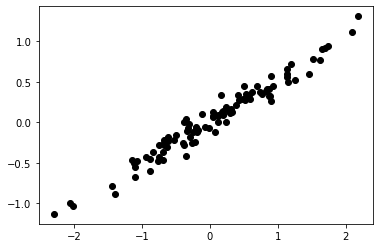

In [23]:
plt.plot(data[:,0], data[:,1], 'o', color='black');

Center the matrix by removing the data mean

In [28]:
means = np.mean(data, axis=0)
print(means)
centered_matrix = data - means

[0.06058285 0.0455709 ]


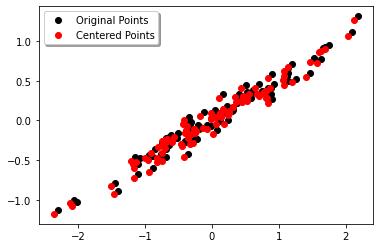

In [24]:
plt.plot(data[:,0], data[:,1], 'o', color='black');
plt.plot(centered_matrix[:,0], centered_matrix[:,1], 'o', color='red');
plt.legend(('Original Points', 'Centered Points'), loc='upper left', shadow=True)

In [20]:
U, S, Vt = linalg.svd(centered_matrix)

pca_matrix = centered_matrix.dot(Vt.T)
pca_components = Vt
pca_variance = np.var(pca_matrix, axis=0)
pca_variance_ratio = pca_variance / np.sum(pca_variance)

print(f"PCA Components:\n{pca_components}")
print(f"PCA Explained Variance:\n{pca_variance}")
print(f"PCA Explained Variance Ratios:\n{pca_variance_ratio}")

PCA Components:
[[-0.88938337 -0.45716213]
 [ 0.45716213 -0.88938337]]
PCA Explained Variance:
[0.98871302 0.00682676]
PCA Explained Variance Ratios:
[0.99314266 0.00685734]


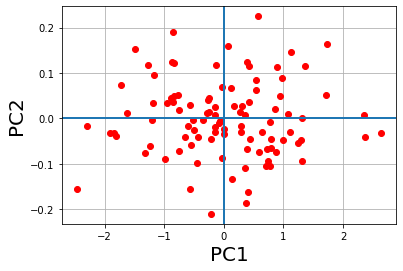

In [34]:
plt.plot(pca_matrix[:,0], pca_matrix[:,1], "ro")
plt.grid()
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.axvline(0, lw=2);
plt.axhline(0, lw=2)

[-2.65898617 -1.36677594]
[ 0.11357153 -0.22094706]


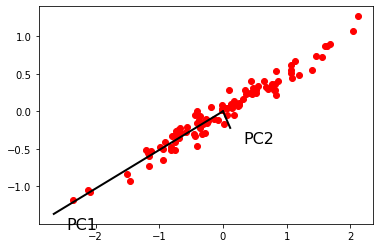

In [25]:
plt.plot(centered_matrix[:,0], centered_matrix[:,1], "ro"); 
count = 0
for length, vector in zip(pca_variance_ratio, pca_components):
    v = vector * 3 * np.sqrt(length)
    print(v)
    plt.plot([0,v[0]], [0,v[1]], "k", lw=2)
    plt.text(v[0]+0.2, v[1]-.2, "PC%s" % (count+1), fontsize=16)
    count += 1